In [11]:
from graphviz import Digraph, Graph
from convertDHCtoUHC import convertDHCtoUHC

### 13.5 (柳本)

In [7]:
def hc_to_diagram(hc_string, is_directed: bool):
    edges = hc_string.split(' ')

    g = Digraph() if is_directed else Graph()
    for edge in edges:
        [src, dst] = edge.split(',')
        g.edge(src, dst)

    return g

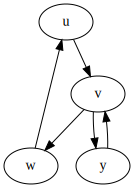

In [8]:
dhc_string = 'u,v v,w w,u v,y y,v'
hc_to_diagram(dhc_string, is_directed=True)

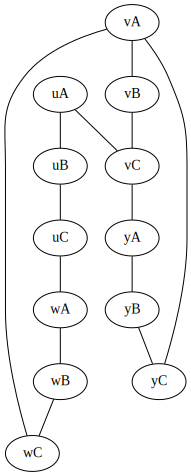

In [12]:
uhc_string = convertDHCtoUHC(dhc_string)
hc_to_diagram(uhc_string, is_directed=False)

In [14]:
print(uhc_string)

uA,uB uA,vC uB,uC uC,wA vA,vB vA,wC vA,yC vB,vC vC,yA wA,wB wB,wC yA,yB yB,yC


### 13.10（柳本）

入力
$$
\begin{aligned}
\text{w1} &= \text{NOT x2} \\
\text{w2} &= \text{x1 AND w1} \\
\text{w3} &= \text{w2 OR x2 OR x3} \\
\text{output} &= \text{w1 AND w3 AND x3} \\
\end{aligned}
$$
ステップ1 (2入力ゲートへの変換)
$$
\begin{aligned}
\text{w1} &= \text{NOT x2} \\
\text{w2} &= \text{x1 AND w1} \\
\text{w3a} &= \text{w2 OR x2} \\
\text{w3} &= \text{w3a OR x3} \\
\text{outputa} &= \text{w1 AND w3} \\
\text{output} &= \text{outputa AND x3} \\
\end{aligned}
$$
ステップ2 (等価なCNF式への変換)
$$
\begin{aligned}
&(w_1 \lor x_2) \land (\lnot w_1 \lor \lnot x_2) \\
&(\lnot x_1 \lor \lnot w_1 \lor w_2) \land (x_1 \lor \lnot w_2) \land (w_1 \lor \lnot w_2) \\
&(w_2 \lor x_2 \lor \lnot w_3^a) \land (\lnot w_2 \lor w_3^a) \land (\lnot x_2 \lor w_3^a) \\
&(w_3^a \lor x_3 \lor \lnot w_3) \land (\lnot w_3^a \lor w_3) \land (\lnot x_3 \lor w_3) \\
&(\lnot w_1 \lor \lnot w_3 \lor \text{out}^a) \land (w_1 \lor \lnot \text{out}^a)\land (w_3 \lor \lnot \text{out}^a) \\
&(\lnot \text{out}^a \lor \lnot x_3 \lor \text{out}) \land (\text{out}^a \lor \lnot \text{out}) \land (x_3 \lor \lnot \text{out})
\end{aligned}
$$
ステップ3 (結合)
$$
\begin{aligned}
\,&(w_1 \lor x_2) \land (\lnot w_1 \lor \lnot x_2) \\
\land\, &(\lnot x_1 \lor \lnot w_1 \lor w_2) \land (x_1 \lor \lnot w_2) \land (w_1 \lor \lnot w_2) \\
\land\, &(w_2 \lor x_2 \lor \lnot w_3^a) \land (\lnot w_2 \lor w_3^a) \land (\lnot x_2 \lor w_3^a) \\
\land\, &(w_3^a \lor x_3 \lor \lnot w_3) \land (\lnot w_3^a \lor w_3) \land (\lnot x_3 \lor w_3) \\
\land\, &(\lnot w_1 \lor \lnot w_3 \lor \text{out}^a) \land (w_1 \lor \lnot \text{out}^a)\land (w_3 \lor \lnot \text{out}^a) \\
\land\, &(\lnot \text{out}^a \lor \lnot x_3 \lor \text{out}) \land (\text{out}^a \lor \lnot \text{out}) \land (x_3 \lor \lnot \text{out}) \\
\land\, & \text{out}
\end{aligned}
$$

### 答

正インスタンス.
$(x_1, x_2, x_3, w_1, w_2, w_3^a, w_3, \text{out}^a, \text{out}) = (1, 0, 1, 1, 1, 1, 1, 1, 1)$は充足する。

|x1|x2|x3|w1|w2|w3a|w3|outputa|output|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1|1|1|0|0|1|1|0|0|
|1|1|0|0|0|1|1|0|0|
|1|0|1|1|1|1|1|1|1|
|1|0|0|1|1|1|1|1|0|
|0|1|1|0|0|1|1|0|0|
|0|1|0|0|0|1|1|0|0|
|0|0|1|1|0|0|1|1|1|
|0|0|0|1|0|0|0|0|0|

### 13.15 (柳本)
アルゴリズム$C$は青の節点をグラフから削除するアルゴリズムとする。
- (a)(b)定義から赤ハミルトン閉路は、青の節点を除いたグラフのハミルトン閉路と等しい
- (c) 右から入力を読んでいき、青の節点を含むエッジを削除すれば良いので、$O(n\log n)$で実行可能
注: blueのリストを作成(定義からソート済)、各エッジのノードがそのblueのリストに含まれているかどうかは$O(\log n)$で判定できるので.
